# my GITHUB & LinkedIN

GITHUB: https://github.com/Nirab123456 </br>
LinnkedIN: https://www.linkedin.com/in/rifatul-islam-majumder/

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle


In [2]:
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression , LinearRegression 
# Support Vector Machine classification algorithm
from sklearn.svm import SVC , LinearSVC , NuSVC, OneClassSVM, SVR
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier , DecisionTreeRegressor , ExtraTreeRegressor 
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier , RadiusNeighborsClassifier , KNeighborsRegressor , RadiusNeighborsRegressor

In [3]:
obesity = pd.read_csv('estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv')
obesity.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


In [4]:
obesity['NObeyesdad'].value_counts()

NObeyesdad
4    342
6    323
5    297
2    289
1    285
3    278
0    272
Name: count, dtype: int64

# We can create verious regression plot to visualize more instingts and relations of dependent and indepent variable and what we want to know and predict 

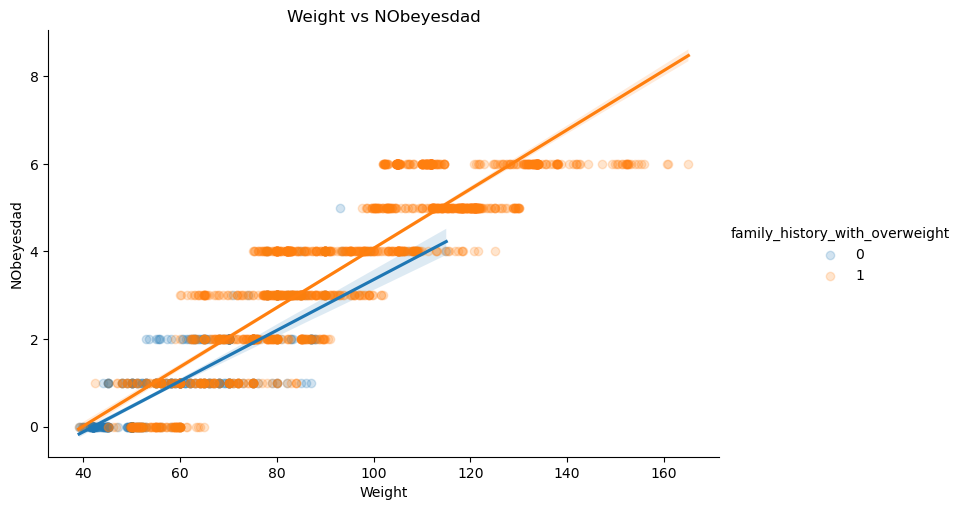

In [5]:
#lets plot a multi leniar regression plot of Weight ,NObeyesdad hue family_history_with_overweight
sns.lmplot(x='Weight', y='NObeyesdad', data=obesity, aspect=1.5, scatter_kws={'alpha':0.2},hue='family_history_with_overweight')
plt.xlabel('Weight')
plt.ylabel('NObeyesdad')
plt.title('Weight vs NObeyesdad')
plt.show()


# we can visualize a multi-regression relationship between independent two group(Weight & family_history_with_overweight) in respect to NObeyesdad
 

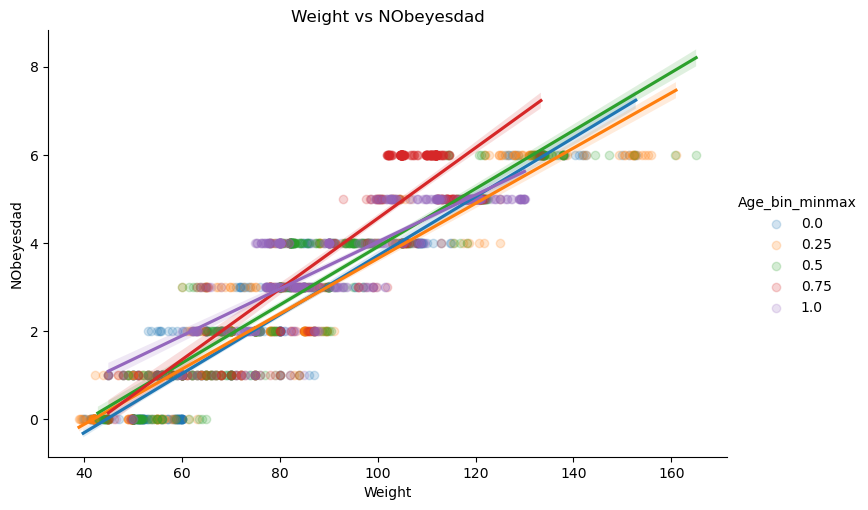

In [6]:
#lets plot another multi  leniar regression plot of Weight ,NObeyesdad hue Age_bin_minmax
sns.lmplot(x='Weight', y='NObeyesdad', data=obesity, aspect=1.5, scatter_kws={'alpha':0.2},hue='Age_bin_minmax')
plt.xlabel('Weight')
plt.ylabel('NObeyesdad')
plt.title('Weight vs NObeyesdad')
plt.show()



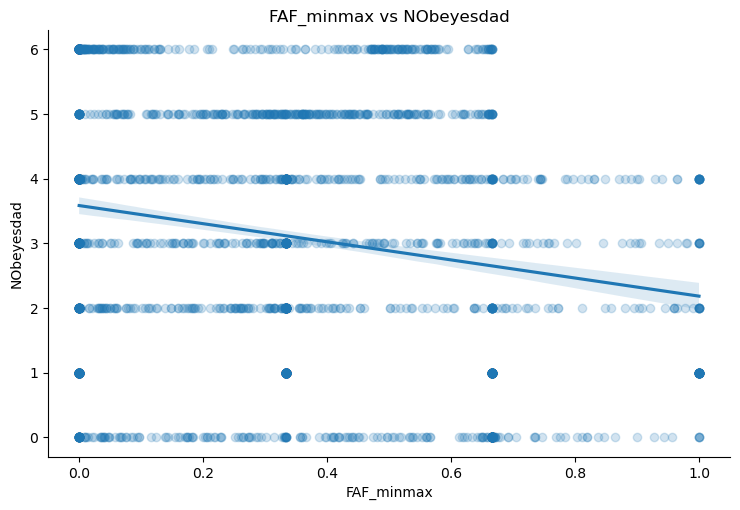

In [7]:
#lets plot another multi  leniar regression plot of FAF_minmax ,NObeyesdad
sns.lmplot(x='FAF_minmax', y='NObeyesdad', data=obesity, aspect=1.5, scatter_kws={'alpha':0.2})
plt.xlabel('FAF_minmax')
plt.ylabel('NObeyesdad')
plt.title('FAF_minmax vs NObeyesdad')
plt.show()


# we can little visualize inverse relationship between obesity and workout habit

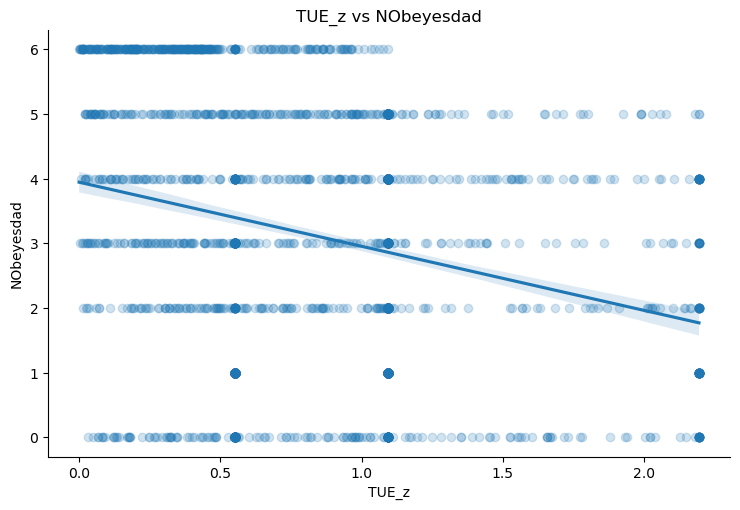

In [8]:
#lets plot another multi  leniar regression plot of TUE_z ,NObeyesdad
sns.lmplot(x='TUE_z', y='NObeyesdad', data=obesity, aspect=1.5, scatter_kws={'alpha':0.2})
plt.xlabel('TUE_z')
plt.ylabel('NObeyesdad')
plt.title('TUE_z vs NObeyesdad')
plt.show()




# we can also visualize a little  inverse relationship between electronic device using trend and obesity

# now lets work on predicting NObeyesdad (categorical feature) we will 1st use Logistic Linear  relation ship then Logistic multi Linear after that we will try other algo

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Define labels for the confusion matrix
    labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


Accuracy of logistic regression classifier on test set: 0.42


c:\Users\rifat\miniconda3\envs\pycherm\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


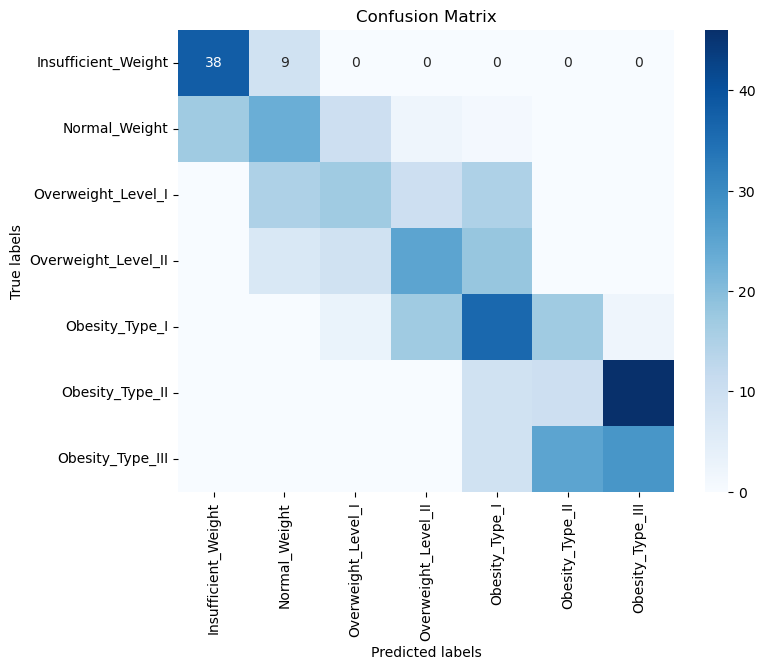

In [10]:

#;ets build a logistic model between Weight and NObeyesdad
X = obesity[['Weight']]
Y = obesity['NObeyesdad']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
plot_confusion_matrix(Y_test,Y_pred)




# we can see based on a single feature we are gatting a good relationship between Weight and NObeyesdad (43% on test set)

In [11]:
new_obesity = obesity.copy()

In [12]:
new_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height                          2086 non-null   float64
 1   Weight                          2086 non-null   float64
 2   family_history_with_overweight  2086 non-null   int64  
 3   SCC                             2086 non-null   int64  
 4   MTRANS_Walking                  2086 non-null   int64  
 5   FAVC_z                          2086 non-null   float64
 6   FCVC_minmax                     2086 non-null   float64
 7   NCP_z                           2086 non-null   float64
 8   CAEC_minmax                     2086 non-null   float64
 9   CH2O_minmax                     2086 non-null   float64
 10  FAF_minmax                      2086 non-null   float64
 11  TUE_z                           2086 non-null   float64
 12  CALC_z                          20

Accuracy of logistic regression classifier on test set: 0.67


c:\Users\rifat\miniconda3\envs\pycherm\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


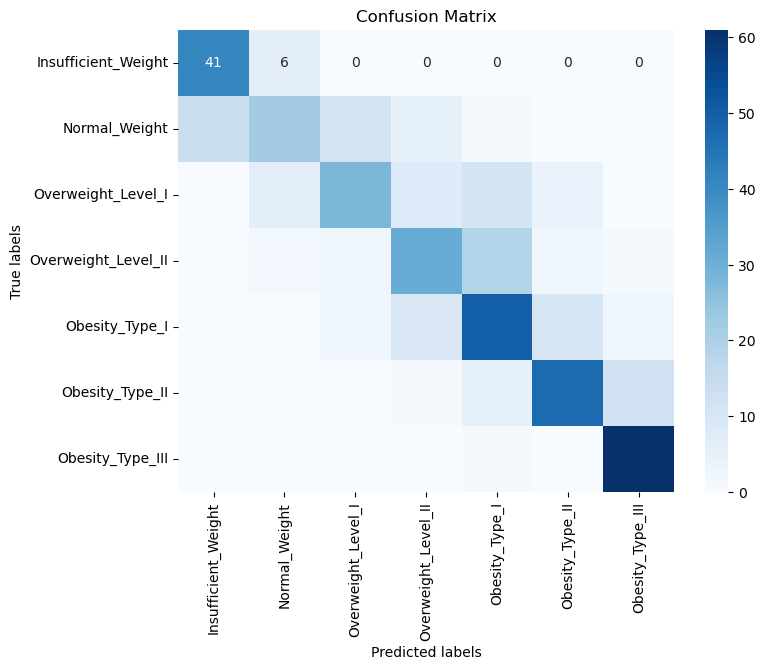

In [13]:
#lets build a multi logistic model and all the features
Y = obesity['NObeyesdad']
X = obesity.drop(['NObeyesdad'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
plot_confusion_matrix(Y_test,Y_pred)


# just a simple multilenier model is providing 67% accuracy lets try to evalute the model with hyper parameters 

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of logistic regression classifier on test set: 0.71


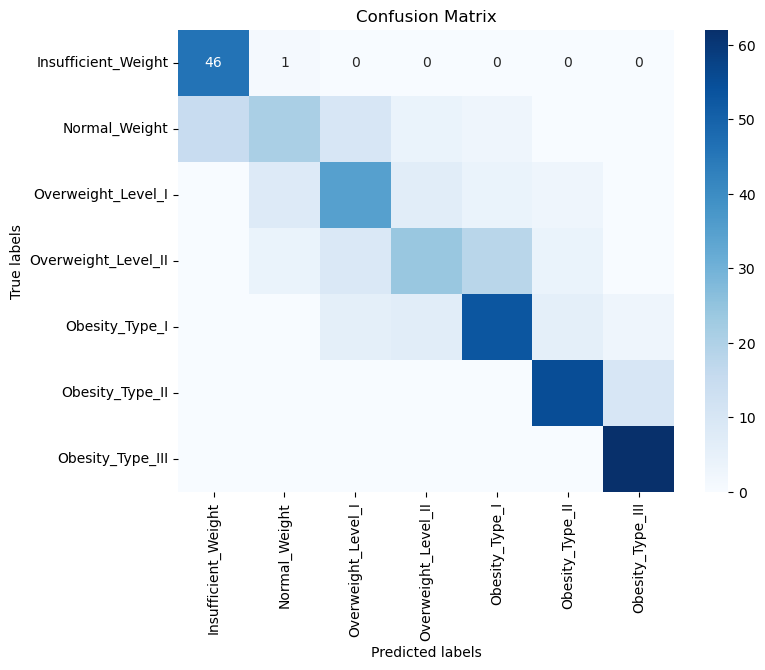

In [14]:
#lets build a multi logistic model and all the features with grid search
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['liblinear']}# l1 lasso l2 ridge
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, cv=10)
clf.fit(X_train, Y_train)
print('Best parameters:', clf.best_params_)
Y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))
plot_confusion_matrix(Y_test,Y_pred)

# using gridsearch provides 71% of accuracy test data

Accuracy of SVM classifier on test set: 0.55


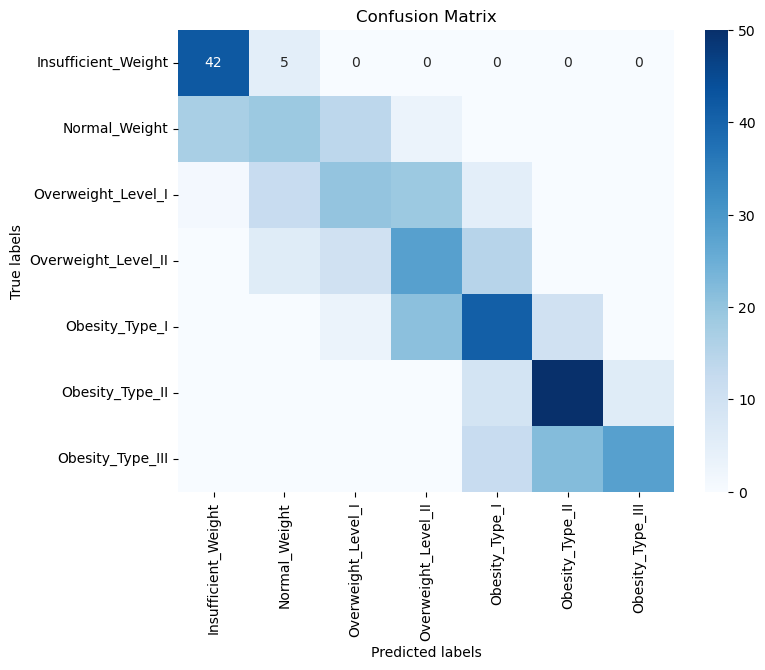

In [15]:
#simple support vector machine model
svm = SVC()
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, Y_test)))
plot_confusion_matrix(Y_test,Y_pred)


Best parameters: {'C': 10, 'kernel': 'linear'}
Accuracy of SVM classifier on test set: 0.96


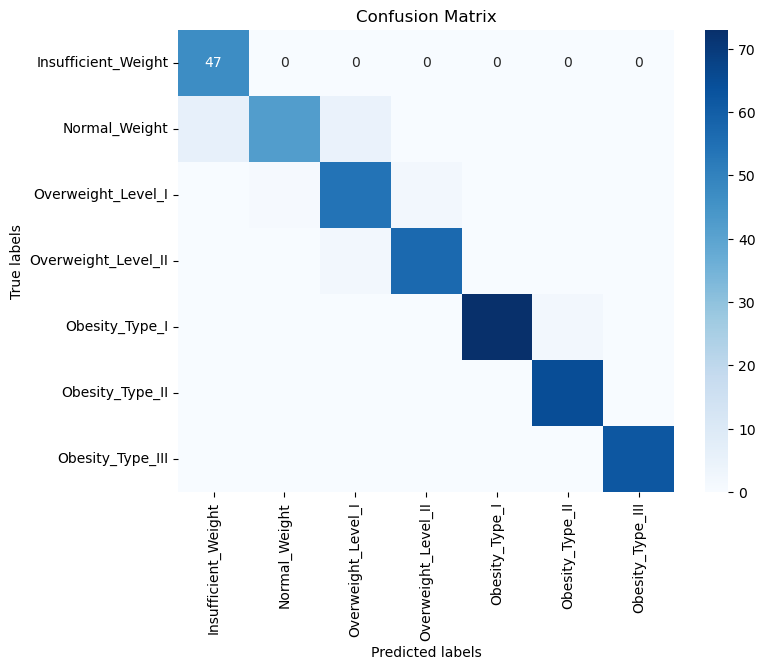

In [17]:
#lets build a multi support vector machine model and all the features with grid search
parameters ={'C':[0.1,1,10],'kernel':['linear','rbf']}
svm = SVC()
clf = GridSearchCV(svm, parameters, cv=10)
clf.fit(X_train, Y_train)
print('Best parameters:', clf.best_params_)
Y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))
plot_confusion_matrix(Y_test,Y_pred)


# just a simple support vector machine model  is providing 96% accuracy lets try to evalute the model with hyper parameters what we can expect maximum 

In [18]:
#save support vector machine model in pickle file
filename = 'svm_model.sav'
pickle.dump(clf, open(filename, 'wb'))

#load support vector machine model from pickle file
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)


0.9569377990430622


# THANK YOU